In [1]:
#%pylab inline
from FastCDF import fastCDF
import matplotlib.pylab as plt
import numpy as np

In [167]:
nb = 1000000
x = np.random.normal(size=(2,nb));
# y =1 for simple CDF
y =  np.ones([nb])

# define the grid (same in both dimension)
Ng = 200
xm = 4
xg = np.linspace(-xm,xm, Ng)
yg = xg 
zg = [xg,yg]
cdf = fastCDF(x,zg,y).reshape(Ng,Ng)
print(cdf.shape)

(200, 200)


In [168]:
np.max(cdf)

0.9999309999999995

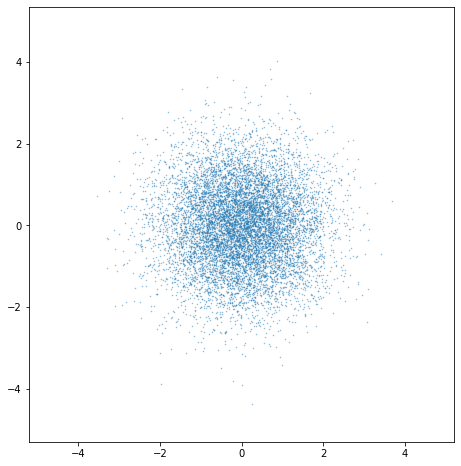

In [171]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
plt.plot(x[0,:], x[1,:],'.',alpha=.5,ms=1, markevery=100);
ax.set_aspect("equal")
#ax.set_aspect("equal");

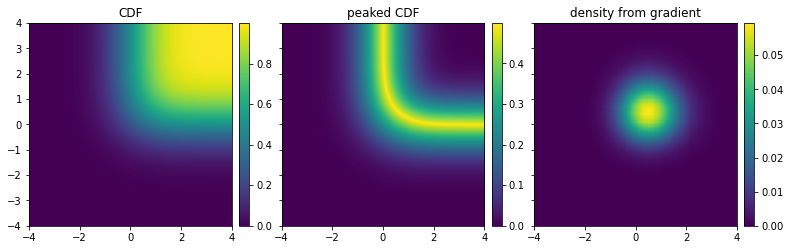

In [172]:
grad = np.gradient(cdf,xg,yg)
ga = ((grad[0]*grad[1]).reshape(Ng,Ng))
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.axes_grid1 import AxesGrid
plt.rcParams["mpl_toolkits.legacy_colorbar"] = False
pcdf = np.minimum(cdf,1-cdf) # peaked CDF
fig = plt.figure(figsize=(13,6))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 3), axes_pad=0.45,cbar_mode="each",cbar_location="right",cbar_pad=0.1)
cc = grid[0].imshow(cdf,origin='lower', extent=[xg.min(),xg.max(),yg.min(),yg.max()])
grid[0].set_title("CDF")
grid.cbar_axes[0].colorbar(cc)
#fig.colorbar(cc)
c = grid[1].imshow(pcdf,origin='lower', extent=[xg.min(),xg.max(),yg.min(),yg.max()])
grid[1].set_title("peaked CDF")
grid.cbar_axes[1].colorbar(c)
ccc = grid[2].imshow(ga,origin='lower', extent=[xg.min(),xg.max(),yg.min(),yg.max()])
grid[2].set_title("density from gradient")
grid.cbar_axes[2].colorbar(ccc)
#fig.colorbar(location='right')
plt.show()